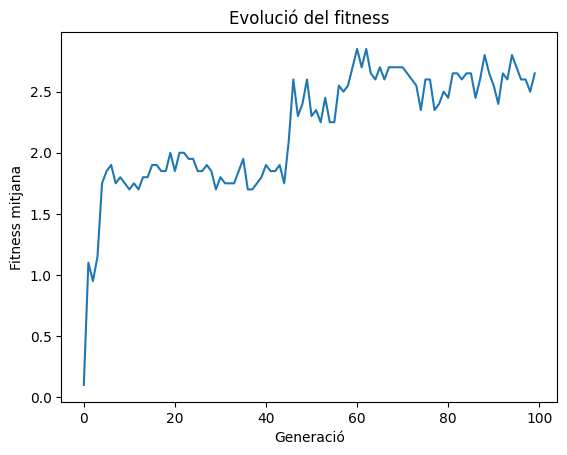

In [1]:
import random
import string
import matplotlib.pyplot as plt

# Paràmetres inicials
tamany_poblacio = 20
longitud_paraula = 3
lletra_objectiu = "CAT"
taxa_mutacio = 0.05
generacions = 100

# Funció per generar una cadena aleatòria
def generar_cadena():
    return ''.join(random.choice(string.ascii_uppercase) for _ in range(longitud_paraula))

# Funció de fitness
def calcular_fitness(cadena):
    return sum([1 if cadena[i] == lletra_objectiu[i] else 0 for i in range(len(cadena))])

# Generar població inicial
poblacio = [generar_cadena() for _ in range(tamany_poblacio)]

# Funció per crear una nova població amb selecció, creuament i mutació
def nova_poblacio(poblacio, fitness):
    nova_poblacio = []
    for _ in range(tamany_poblacio):
        # Selecció de parelles basades en el fitness
        pares = random.choices(poblacio, weights=fitness, k=2)
        fill = creuar_cadenes(pares[0], pares[1])
        fill = mutar_cadena(fill)
        nova_poblacio.append(fill)
    return nova_poblacio

# Funció de creuament de dues cadenes
def creuar_cadenes(pare1, pare2):
    punt_creuament = random.randint(1, longitud_paraula - 1)
    return pare1[:punt_creuament] + pare2[punt_creuament:]

# Funció de mutació amb probabilitat definida per taxa_mutacio
def mutar_cadena(cadena):
    cadena_mutada = list(cadena)
    for i in range(longitud_paraula):
        if random.random() < taxa_mutacio:
            cadena_mutada[i] = random.choice(string.ascii_uppercase)
    return ''.join(cadena_mutada)

# Seguiment del fitness mitjà durant les generacions
fitness_history = []

for _ in range(generacions):
    fitness = [calcular_fitness(cadena) for cadena in poblacio]
    fitness_history.append(sum(fitness) / len(fitness))
    poblacio = nova_poblacio(poblacio, fitness)

# Gràfic de l'evolució del fitness
plt.plot(fitness_history)
plt.xlabel("Generació")
plt.ylabel("Fitness mitjana")
plt.title("Evolució del fitness")
plt.show()

Problema 1: Objectiu de Paraula Diferent
L'objectiu és modificar l'algoritme perquè trobi la paraula "HELLO" en lloc de "CAT". Això implicarà ajustar la longitud de les cadenes i altres paràmetres per mantenir el rendiment.

In [2]:
longitud_paraula = 5
lletra_objectiu = "HELLO"

Resposta: Quan es canvia la paraula objectiu a una més llarga com "HELLO", l'algoritme requereix més generacions per convergir. Una mida de població més gran i una taxa de mutació lleugerament incrementada poden ajudar a trobar la solució òptima més ràpidament.

Problema 2: Augment de la Mida de la Població Augmentem la mida de la població a 50 individus per observar com això afecta la convergència de l'algoritme. L'objectiu és veure si una major diversitat genètica redueix la probabilitat de quedar atrapat en òptims locals.


In [3]:
# Paràmetres per al problema 2
tamany_poblacio = 50

Augmentar la mida de la població millora la qualitat de la solució final, ja que es proporciona més diversitat genètica. Això redueix la probabilitat de quedar atrapat en òptims locals i afavoreix una exploració més àmplia de l'espai de solucions. No obstant això, aquesta millora comporta un increment en el temps d'execució.



Problema 3: Penalització per Caràcters Repetits Per aquest problema, modifiquem la funció de fitness per afegir una penalització per solucions amb caràcters repetits. Això farà que les solucions amb caràcters repetits siguin menys aptes per a la selecció, afavorint les solucions amb caràcters únics.

In [4]:
# Funció de fitness amb penalització per caràcters repetits
def calcular_fitness_penalitzat(cadena):
    fitness = sum([1 if cadena[i] == lletra_objectiu[i] else 0 for i in range(len(cadena))])
    penalitzacio = len(cadena) - len(set(cadena))  # Penalitza caràcters repetits
    return fitness - penalitzacio

# Ajust del bucle principal per utilitzar la funció amb penalització
fitness = [calcular_fitness_penalitzat(cadena) for cadena in poblacio]

Afegir una penalització per caràcters repetits ajuda a mantenir la diversitat genètica de la població, evitant la convergència prematura i orientant l'algoritme cap a solucions més òptimes. Tot i això, una penalització massa estricta pot desacelerar la convergència i dificultar la millora de solucions amb petites repeticions.

Problema 4: Població Inicial Aleatòria amb Coincidències Inicialitzarem una part de la població amb cadenes que contenen coincidències parcials amb la paraula objectiu. Això pot ajudar a accelerar la convergència cap a la solució òptima.

In [5]:
# Generar població inicial amb una part de coincidències
def generar_cadena_amb_coincidencies():
    cadena = list(generar_cadena())
    indices = random.sample(range(longitud_paraula), 2)  # Seleccionem dues lletres correctes
    for i in indices:
        cadena[i] = lletra_objectiu[i]
    return ''.join(cadena)

# Generar població mixta
poblacio = [generar_cadena() for _ in range(tamany_poblacio // 2)] + \
           [generar_cadena_amb_coincidencies() for _ in range(tamany_poblacio // 2)]
print("Població inicial amb coincidències:", poblacio)

Població inicial amb coincidències: ['VODFG', 'OXEPU', 'VFXEH', 'HMXCH', 'MYBFV', 'NNSDD', 'VNVWC', 'XSEHK', 'HJRVS', 'DNSQE', 'DMYFB', 'CZEGM', 'RDEED', 'FVCQE', 'TSCER', 'BKQYY', 'MYYLU', 'FYJKM', 'CFDRH', 'LIVFU', 'TJQBN', 'UEYUI', 'ZFHMS', 'QBXUU', 'VGLRK', 'GEMLO', 'HBHLP', 'HSLRL', 'HENAK', 'HOLNS', 'RELCA', 'LEKAO', 'YRLUO', 'LEALZ', 'WHLLO', 'HGTGO', 'INLLW', 'JQLDO', 'VELKD', 'BRLXO', 'KEOYO', 'HJKBO', 'NOLVO', 'IQLMO', 'DELED', 'HELVQ', 'HZLIM', 'HLILC', 'HULZF', 'HUJLF']


Inicialitzar part de la població amb caràcters que coincideixen amb la paraula objectiu permet una convergència més ràpida, ja que es redueix el nombre de generacions necessàries per trobar la solució òptima.

Problema 5: Evolució del Fitness Hem afegit un seguiment del fitness al llarg de les generacions per observar com millora l'algoritme. Això permet visualitzar la convergència de la solució al llarg del temps.

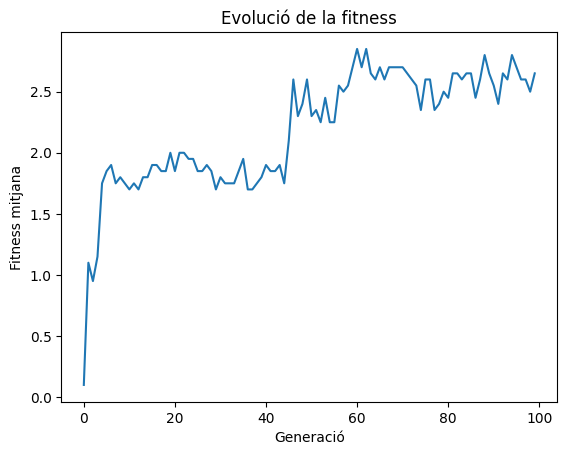

In [6]:
# Gràfic de l'evolució de la fitness
plt.plot(fitness_history)
plt.xlabel("Generació")
plt.ylabel("Fitness mitjana")
plt.title("Evolució de la fitness")
plt.show()

L'evolució de la fitness mostra un increment constant, indicant que l'algoritme s'està acostant a la solució òptima. Aquest seguiment del fitness proporciona informació sobre la velocitat de convergència i si l'algoritme està efectivament millorant amb cada generació.